In [54]:
import numpy as np
import pandas as pd
import json
import os
import pickle
from collections import Counter
import matplotlib.pyplot as plt

In [28]:
structure=pd.read_csv('data/ICSD-info.csv')
path='extracted_data/'
extracted_data_files=os.listdir(path)
data={}
for file in extracted_data_files:
    with open(path+file, 'r') as fp:
        data.update(json.load(fp))  

disorder=pd.DataFrame.from_dict(data,orient='index')
disorder=disorder.loc[~disorder['entropy'].isna()]
disorder.reset_index(inplace=True,drop=True)
structure=pd.read_csv('data/ICSD-info.csv')
disorder=disorder.merge(structure,how='inner',left_on='ICSD_ID',right_on='Col_code')

In [29]:
disorder.head(3)

,formula,ICSD_ID,group_num,Z,label,species,multiplicity,Wyckoff_symbol,occupancy,internal_intersection,...,StructureType,Temperature,Pressure,CellVolume,FormulaUnitsPerCell,MineralName,MineralGroup,PearsonSymbol,ANXFormula,ABFormula
0,As2 Ba1 Cu1.88,78757,139,2,"{'0': 'Ba1', '1': 'Cu1', '2': 'As1'}","{'0': {'Ba2+': 1.0}, '1': {'Cu2+': 0.94}, '2':...","{'0': 2, '1': 4, '2': 4}","{'0': 'a', '1': 'd', '2': 'e'}","{'0': 1.0, '1': 0.94, '2': 1.0}","{'0': False, '1': False, '2': False}",...,ThCr2Si2#CeGa2Al2#BaAl4,293.0,0.101325,199.29,2,NaN,NaN,tI10,AB2X2,A2B3.8C4
1,Be13 Sb1,834,226,8,"{'0': 'Sb1', '1': 'Be2', '2': 'Be1'}","{'0': {'Sb0+': 1.0}, '1': {'Be0+': 1.0}, '2': ...","{'0': 8, '1': 96, '2': 8}","{'0': 'a', '1': 'i', '2': 'b'}","{'0': 1.0, '1': 1.0, '2': 1.0}","{'0': False, '1': False, '2': False}",...,NaZn13,293.0,0.101325,1013.86,8,NaN,NaN,cF112,NO13,AB13
2,Au1 Ho1 Pb1,58487,216,4,"{'0': 'Au1', '1': 'Ho1', '2': 'Pb1'}","{'0': {'Au0+': 1.0}, '1': {'Ho0+': 1.0}, '2': ...","{'0': 4, '1': 4, '2': 4}","{'0': 'c', '1': 'b', '2': 'a'}","{'0': 1.0, '1': 1.0, '2': 1.0}","{'0': False, '1': False, '2': False}",...,Heusler(half)#AlLiSi#MgAgAs,293.0,0.101325,303.19,4,NaN,NaN,cF12,NOP,ABC


In [30]:
df=disorder

In [31]:
Wyck_Dis=[]
for i in range(len(df)):
    new_Wyck={j:df['Wyckoff_symbol'].values[i][j]+df['orbit_disorder'].values[i][j] for j in df['Wyckoff_symbol'].values[i].keys()}
    letter_count = Counter(new_Wyck.values())
    sorted_letters = sorted(letter_count.items(), key=lambda x: x[0], reverse=True)
    seq=''
    for (sym,num) in sorted_letters:
        seq+=sym+str(num)+'_'
    Wyck_Dis.append(seq[:-1])

In [32]:
df['Disordered_Wyckoff_sequence']=Wyck_Dis

In [33]:
fractions=[]
for i in range(len(df)):
    multi=df.iloc[i]['multiplicity']
    orbit_disorder=df.iloc[i]['orbit_disorder']
    fractions_vec={'O':0,'S':0,'V':0,'SV':0,'VP':0,'SVP':0}
    total_number_of_sites=0
    for key in orbit_disorder.keys():
        total_number_of_sites+=multi[key]
        fractions_vec[orbit_disorder[key]]+=multi[key]

    if(total_number_of_sites>0):
        for key, value in fractions_vec.items():
            fractions_vec[key]=round(value/total_number_of_sites,3)
    fractions.append(fractions_vec)

In [34]:
df['fractions']=fractions

In [35]:
dff=df[['formula','ICSD_ID','Disordered_Wyckoff_sequence','entropy','fractions']]

In [36]:
dff.to_json('calculated_data/Wyckoff_Disorder_no_H.json')

In [37]:
dff.to_pickle('calculated_data/Wyckoff_Disorder_no_H.pkl')

In [41]:
structure.columns

Index(['Unnamed: 0', 'DB_id', 'Col_code', 'name', 'StructureType',
       'Temperature', 'Pressure', 'CellVolume', 'FormulaUnitsPerCell',
       'MineralName', 'MineralGroup', 'PearsonSymbol', 'ANXFormula',
       'ABFormula'],
      dtype='object')

In [51]:
df.columns

Index(['formula', 'ICSD_ID', 'group_num', 'Z', 'label', 'species',
       'multiplicity', 'Wyckoff_symbol', 'occupancy', 'internal_intersection',
       'external_intersection', 'intersecting_orbits',
       'intersect_orbit_connected', 'orbit_disorder', 'entropy', 'Unnamed: 0',
       'DB_id', 'Col_code', 'name', 'StructureType', 'Temperature', 'Pressure',
       'CellVolume', 'FormulaUnitsPerCell', 'MineralName', 'MineralGroup',
       'PearsonSymbol', 'ANXFormula', 'ABFormula',
       'Disordered_Wyckoff_sequence', 'fractions'],
      dtype='object')

In [44]:
db=df.loc[df['StructureType']=='Bronze(hex)#HTB#K0.26WO3']
len(db)

25

In [48]:
len(set(db['formula'].values))

19

In [52]:
db[['formula', 'entropy','orbit_disorder','Disordered_Wyckoff_sequence', 'fractions']]

,formula,entropy,orbit_disorder,Disordered_Wyckoff_sequence,fractions
9671,K0.3 O3 Ta0.125 V0.125 W0.75,0.260,"{'0': 'O', '1': 'O', '2': 'VP', '3': 'S'}",iO1_hO1_gS1_eVP1,"{'O': 0.643, 'S': 0.214, 'V': 0.0, 'SV': 0.0, ..."
9963,K0.3 O3 Ta0.15 W0.85,0.188,"{'0': 'S', '1': 'O', '2': 'VP', '3': 'O'}",iO1_hO1_gS1_eVP1,"{'O': 0.643, 'S': 0.214, 'V': 0.0, 'SV': 0.0, ..."
16988,K0.3 O3 Ta0.2 W0.8,0.205,"{'0': 'S', '1': 'O', '2': 'O', '3': 'VP'}",iO1_hO1_gS1_eVP1,"{'O': 0.643, 'S': 0.214, 'V': 0.0, 'SV': 0.0, ..."
17095,K0.26 O3 W1,0.092,"{'0': 'VP', '1': 'O', '2': 'O', '3': 'O'}",iO1_hO1_gO1_eVP1,"{'O': 0.857, 'S': 0.0, 'V': 0.0, 'SV': 0.0, 'V..."
24546,K0.3 O3 Ta0.25 W0.75,0.220,"{'0': 'VP', '1': 'S', '2': 'O', '3': 'O'}",iO1_hO1_gS1_eVP1,"{'O': 0.643, 'S': 0.214, 'V': 0.0, 'SV': 0.0, ..."
28123,K0.3 O3 W1,0.089,"{'0': 'VP', '1': 'O', '2': 'O', '3': 'O'}",iO1_hO1_gO1_eVP1,"{'O': 0.857, 'S': 0.0, 'V': 0.0, 'SV': 0.0, 'V..."
39178,K0.3 O3 Ta0.1 V0.1 W0.8,0.238,"{'0': 'O', '1': 'O', '2': 'VP', '3': 'S'}",iO1_hO1_gS1_eVP1,"{'O': 0.643, 'S': 0.214, 'V': 0.0, 'SV': 0.0, ..."
39405,K0.3 O3 V0.16 W0.84,0.191,"{'0': 'O', '1': 'VP', '2': 'O', '3': 'S'}",iO1_hO1_gS1_eVP1,"{'O': 0.643, 'S': 0.214, 'V': 0.0, 'SV': 0.0, ..."
42293,K0.3 O3 V0.15 W0.85,0.187,"{'0': 'VP', '1': 'O', '2': 'S', '3': 'O'}",iO1_hO1_gS1_eVP1,"{'O': 0.643, 'S': 0.214, 'V': 0.0, 'SV': 0.0, ..."
42335,K0.3 O3 Ta0.075 V0.075 W0.85,0.212,"{'0': 'S', '1': 'O', '2': 'VP', '3': 'O'}",iO1_hO1_gS1_eVP1,"{'O': 0.643, 'S': 0.214, 'V': 0.0, 'SV': 0.0, ..."


In [83]:
min(db['entropy'].values), max(db['entropy'].values)

(0.089, 0.28)

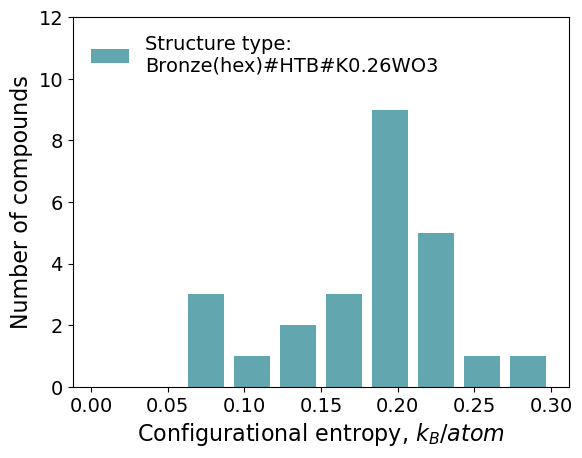

In [86]:
plt.hist(db[['entropy']],bins=10, range=(0,0.3), histtype='barstacked',rwidth=0.8, alpha=0.7, label='Structure type:\nBronze(hex)#HTB#K0.26WO3', color=(31/256, 129/256, 142/256))
plt.xlabel('Configurational entropy, $k_B/atom$',fontsize=16)
plt.xticks(fontsize=14)
plt.ylim(0,12)
plt.ylabel('Number of compounds',fontsize=16)
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left',frameon=False)
plt.savefig('images/StructureType-entropy.png', transparent=None, dpi=400, format='png',bbox_inches='tight')
plt.show()

In [84]:
db['fractions'].values

array([{'O': 0.643, 'S': 0.214, 'V': 0.0, 'SV': 0.0, 'VP': 0.143, 'SVP': 0.0},
       {'O': 0.643, 'S': 0.214, 'V': 0.0, 'SV': 0.0, 'VP': 0.143, 'SVP': 0.0},
       {'O': 0.643, 'S': 0.214, 'V': 0.0, 'SV': 0.0, 'VP': 0.143, 'SVP': 0.0},
       {'O': 0.857, 'S': 0.0, 'V': 0.0, 'SV': 0.0, 'VP': 0.143, 'SVP': 0.0},
       {'O': 0.643, 'S': 0.214, 'V': 0.0, 'SV': 0.0, 'VP': 0.143, 'SVP': 0.0},
       {'O': 0.857, 'S': 0.0, 'V': 0.0, 'SV': 0.0, 'VP': 0.143, 'SVP': 0.0},
       {'O': 0.643, 'S': 0.214, 'V': 0.0, 'SV': 0.0, 'VP': 0.143, 'SVP': 0.0},
       {'O': 0.643, 'S': 0.214, 'V': 0.0, 'SV': 0.0, 'VP': 0.143, 'SVP': 0.0},
       {'O': 0.643, 'S': 0.214, 'V': 0.0, 'SV': 0.0, 'VP': 0.143, 'SVP': 0.0},
       {'O': 0.643, 'S': 0.214, 'V': 0.0, 'SV': 0.0, 'VP': 0.143, 'SVP': 0.0},
       {'O': 0.643, 'S': 0.214, 'V': 0.0, 'SV': 0.0, 'VP': 0.143, 'SVP': 0.0},
       {'O': 0.643, 'S': 0.214, 'V': 0.0, 'SV': 0.0, 'VP': 0.143, 'SVP': 0.0},
       {'O': 0.857, 'S': 0.0, 'V': 0.0, 'SV': 0.0, 'VP':